# Health Premium Prediction-ML Regression

This model attempts to model different regression models and select a model using the R2 Score Method.

Data Set:
Independent Variables: age,sex,BMI,child,smoker,region
Dependent variable : Charges

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [5]:
dataset = pd.read_csv('Health_insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### For showing the headingd alone

In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking for missing values:

In [7]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Encoding the categorical datas:

In [8]:
#to check unique elements in each column
print(dataset.sex.unique())
print(dataset.smoker.unique())
print(dataset.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [11]:
print(X[ :10])

[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 28 33.0 3]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 33 22.705 0]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 32 28.88 0]
 [1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 31 25.74 0]
 [1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 46 33.44 1]
 [1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 37 27.74 3]
 [0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 37 29.83 2]
 [1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 60 25.84 0]]


### Splitting the dataset into training set and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature scaling

In [13]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import  StandardScaler 
column_trans = ColumnTransformer(
    [('scaler', StandardScaler(),[8,9,10])],
    remainder='passthrough') 
X_train = column_trans.fit_transform(X_train)
X_test =column_trans.fit_transform(X_test)

### Training the Multiple Linear Regression model on the training set

In [14]:
from sklearn.linear_model import LinearRegression
ML_regressor = LinearRegression()
ML_regressor.fit(X_train, y_train)
y_pred_ML=ML_regressor.predict(X_test) #prediction of this model

### Training the Polynomial Regression model on the training set

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
PLR_regressor = LinearRegression()
PLR_regressor.fit(X_poly,y_train)
y_pred_PL=PLR_regressor.predict(poly_reg.transform(X_test)) #prediction of this model

### Training the Decision tree Regression model on the training set

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor_DTR = DecisionTreeRegressor(random_state = 0)
regressor_DTR.fit(X_train,y_train)
y_pred_DTR=regressor_DTR.predict(X_test) #prediction of this model

### Training the SVR model on the training set

In [17]:
from sklearn.svm import SVR
regressor_SVR = SVR(kernel = 'rbf')
regressor_SVR.fit(X_train,y_train)
y_pred_SVR=regressor_SVR.predict(X_test) #prediction of this model

### Training the Random forest model on the training set

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor_RFR = RandomForestRegressor(random_state = 1)
regressor_RFR.fit(X_train,y_train)
y_pred_RFR=regressor_RFR .predict(X_test) #prediction of this model

### Finding R2 value of all the models

In [19]:
from sklearn.metrics import r2_score
y_score_ML=r2_score(y_test,y_pred_ML)
y_score_PL=r2_score(y_test,y_pred_PL)
y_score_DTR=r2_score(y_test,y_pred_DTR)
y_score_SVR=r2_score(y_test,y_pred_SVR)
y_score_RFR=r2_score(y_test,y_pred_RFR)
print("Linear Regression r2: ",y_score_ML,"\nPolynomial Regression r2: ",y_score_PL,"\nRandomForest Regression r2: ",y_score_RFR,"\nDecision Tree Regression r2: ",y_score_DTR,"\nSupport Vector Regression r2: ",y_score_SVR)

Linear Regression r2:  0.7619582235838139 
Polynomial Regression r2:  0.7766193618531445 
RandomForest Regression r2:  0.8445791597633043 
Decision Tree Regression r2:  0.6850864932338443 
Support Vector Regression r2:  -0.11343477790480705


### Visualising the result

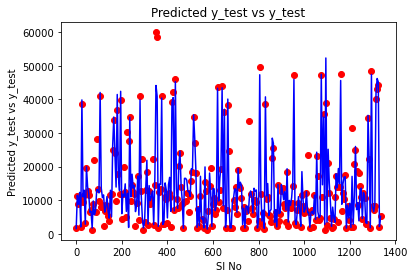

In [20]:
plt.plot(np.arange(0,1340,5),y_pred_RFR, color = 'blue')
plt.scatter(np.arange(0,1340,5),y_test, color = 'red')
plt.title('Predicted y_test vs y_test')
plt.xlabel('Sl No')
plt.ylabel('Predicted y_test vs y_test')
plt.rcParams["figure.figsize"] = (20,50)
plt.show()

### Comparing the results

In [21]:
comparison= np.concatenate((y_pred_RFR.reshape(len(y_pred_RFR),1), y_test.reshape(len(y_test),1)),1)
comparison_data_frame = pd.DataFrame(comparison, columns = ['Predicted','Real'])
print(comparison_data_frame)

        Predicted         Real
0     1543.018215   1646.42970
1    11444.513710  11353.22760
2     8755.793276   8798.59300
3    12301.531609  10381.47870
4     2019.297038   2103.08000
..            ...          ...
263  41759.278261  40103.89000
264  46237.669052  42983.45850
265  45232.291521  44202.65360
266   2121.131948   2136.88225
267   5164.997103   5227.98875

[268 rows x 2 columns]
